In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/factnews_dataset_factuality.csv', encoding='UTF-8')
dataset = dataset.sample(frac=1)

#Show the dataset information
dataset.info()
dataset.isnull()
print(dataset.shape)
dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6191 entries, 6138 to 5078
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file        6191 non-null   object
 1   id_sente    6191 non-null   int64 
 2   id_article  6191 non-null   object
 3   domain      6191 non-null   object
 4   year        6191 non-null   int64 
 5   sentences   6191 non-null   object
 6   classe      6191 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 386.9+ KB
(6191, 7)


,file,id_sente,id_article,domain,year,sentences,classe
6138,C98_OGlobo_19_10_2022_18h02,6139,c98o,politics,2022,"Brancos e nulos somaram 5%, outros 3% dissera...",0
3706,C66_Folha_15-10-2022_08h19,3707,c66f,sports,2022,"Oscar Schmidt, 64, desistiu de seguir com as s...",0
291,C15_OGlobo_20-09-2022_12h25,292,c15o,politics,2022,"Aliados e assessores respiraram aliviados, por...",1
5776,C94_Estadao_18-10-2022_19h36,5777,c94e,politics,2022,"O mérito será para depois das eleições"", decla...",1
1947,C42_Estadao_25-09-2007_14h28,1948,c42e,politics,2007,"Estamos aguardando e isso pode aprofundar, ter...",1
...,...,...,...,...,...,...,...
2964,C58_Estadao_15-09-2022_05h00,2965,c58e,politics,2022,A decisão levou a uma tesourada no programa Fa...,1
2083,C44_OGlobo_02-10-2007_13h23,2084,c44o,politics,2007,O senador Cristovam Buarque (PDT-DF) chegou a ...,0
4829,C80_Folha_17-10-2022_16h56_titulo,4830,c80f,sports,2022,"Karim Benzema, o F1 do futebol, conquista a Bo...",0
3811,C67_OGlobo_15-10-2022_13h46,3812,c67o,politics,2022,"Zema disse que herdou uma ""tragédia"" do govern...",0


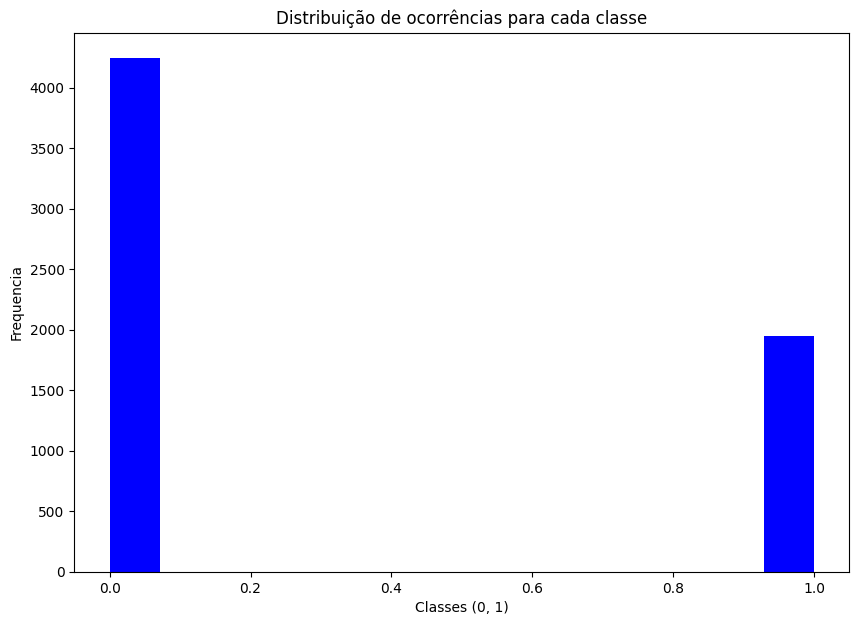

0    4242
1    1949
Name: classe, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
x = dataset ['classe']
plt.hist(x, bins = 'auto', color = "blue")
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()
#-----------------------------------------------------------
dataset ['classe'].value_counts()

In [ ]:
#undersampling - deleting samples from the majority class
classe_0 = dataset[dataset.classe == 0]
classe_1 = dataset[dataset.classe == 1]

#Obtaining the less representative sample
sample_0 = classe_0.sample(n=1949, replace=True)
#sample_1 = classe_2.sample(n=336, replace=True)

#Concatenating new data with LESS representativeness into the initial dataset.
dataset_undersampling = pd.concat([classe_1, sample_0])

print(dataset_undersampling['classe'].value_counts())

1    1949
0    1949
Name: classe, dtype: int64


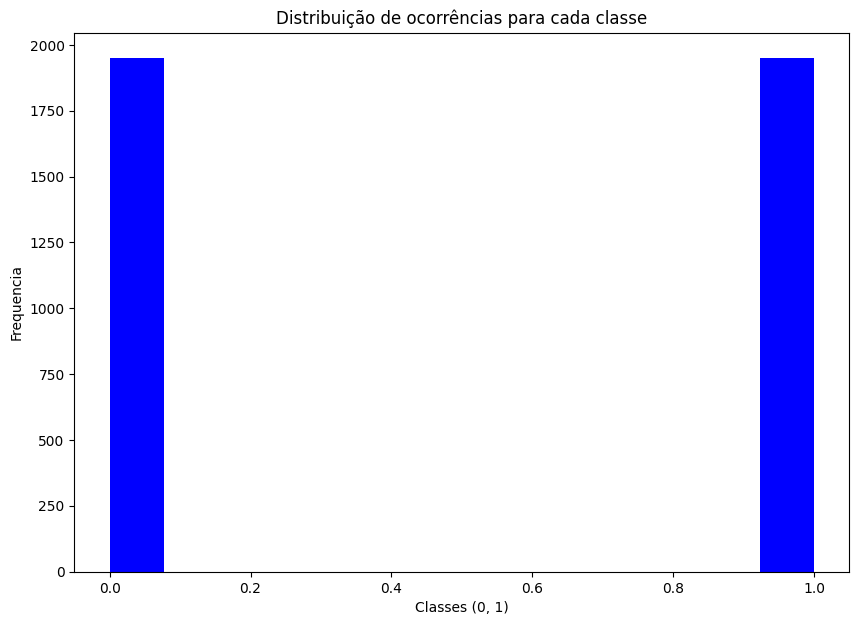

1    1949
0    1949
Name: classe, dtype: int64

In [ ]:
#Balanced dataset
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
x = dataset_undersampling ['classe']
plt.hist(x, bins = 'auto', color = "blue")
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()

dataset_undersampling ['classe'].value_counts()

In [ ]:
!pip install -q streamlit
!pip install spacy
!pip install ktrain
!pip install keras

In [ ]:
!pip install streamlit
!pip install st-annotated-text
!python -m spacy download pt_core_news_sm

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for st-annotated-text: filename=st_annotated_text-4.0.0-py3-none-any.whl size=8904 sha256=9fbc229093f2bfe4b45b8face8e0633aff4923e312afa1e64b71af0c6922f281
  Stored in directory: /root/.cache/pip/wheels/75/24/e8/1c0562e6308f0fff00c6f25972c0bf0a78fbf2be2dc65ef148
  Created wheel for htbuilder: filename=htbuilder-0.6.1-py3-none-any.whl size=12440 sha256=8bf27d3206a5d32a03ec337b78e594d32698ac2d3f695d98f4fc409cedc06b09
  Stored in directory: /root/.cache/pip/wheels/12/d3/e9/e499c6b18281f756e41e385735cf3ea6980baf126f093b0ba1
Successfully built st-annotated-text htbuilder
2023-07-11 12:40:55.508266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 12:40:5

In [ ]:
import keras
import ktrain
from ktrain import text

#bert
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(dataset,
                                                                   'sentences',
                                                                   label_columns='classe',
                                                                   maxlen=64,
                                                                   max_features=500,
                                                                   preprocess_mode='bert',
                                                                   lang='pt',
                                                                   val_pct = 0.1,
                                                                   )

['not_classe', 'classe']
      not_classe  classe
2725         0.0     1.0
755          1.0     0.0
3591         1.0     0.0
107          1.0     0.0
1596         1.0     0.0
['not_classe', 'classe']
      not_classe  classe
1209         1.0     0.0
669          0.0     1.0
1464         1.0     0.0
318          0.0     1.0
673          1.0     0.0
preprocessing train...
language: pt


Is Multi-Label? False
preprocessing test...
language: pt


In [ ]:
#bert classifier
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
classifier = ktrain.get_learner(model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=64
                             )

Is Multi-Label? False
maxlen is 64


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
#Bert Classifier
classifier.fit_onecycle(0.00002,1)



begin training using onecycle policy with max lr of 2e-05...
88/88 [==============================] - 4110s 46s/step - loss: 0.4291 - accuracy: 0.8006 - val_loss: 0.3355 - val_accuracy: 0.8629


In [ ]:
#Bert Results
classifier.validate()

20/20 [==============================] - 137s 7s/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       415
           1       0.92      0.64      0.76       205

    accuracy                           0.86       620
   macro avg       0.88      0.81      0.83       620
weighted avg       0.87      0.86      0.86       620



array([[404,  11],
       [ 74, 131]])

In [ ]:
#save model
predictor = ktrain.get_predictor(classifier.model, preproc).save('factual')

## Install localtunnel

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.5s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



## Run streamlit in background

In [ ]:
!streamlit run /content/main.py &>/content/logs.txt &

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.779s
your url is: https://tough-steaks-roll.loca.lt


In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.7.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.4.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
audioread==3.0.0
autograd==1.6.1
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.6.2
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cached-property==1.5.2
cachetools==5.3.1
catalogue==2.0.8
cchardet==2.1.7
certifi==2023.5.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.6
contextlib2==0.6.0.post1
contourpy==1.1.0
convertdate==2.4.0
cufflinks==0.17.3
cvxopt==1.3.1
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.35
dask==2022.12.1
datascience=

In [ ]:
!pip install coloroma

ERROR: Could not find a version that satisfies the requirement coloroma (from versions: none)
ERROR: No matching distribution found for coloroma


[![ko-fi](https://www.ko-fi.com/img/githubbutton_sm.svg)](https://ko-fi.com/Y8Y3VYYE)